<a href="https://colab.research.google.com/github/chirag2saraiya/TSAI-DeepVision-EVA4/blob/master/02-Transferlearning-Mobilenet/Sessionp2s2_MobileNetV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libs

In [ ]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.autograd import Variable
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout
from torch.optim import Adam, SGD 
import numpy as np
import pandas as pd
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
from PIL import Image

plt.ion()   # interactive mode

# Fetch Data

In [ ]:

dataZipFilePath = '/content/drive/My Drive/p2s2Data/resizedDatasetP2S2_300x300.zip'
!unzip -q /content/drive/My\ Drive/p2s2Data/resizedDatasetP2S2_300x300.zip -d ./


In [ ]:
!git clone https://github.com/chirag2saraiya/TSAI-DeepVision-EVA4.git

Cloning into 'TSAI-DeepVision-EVA4'...
remote: Enumerating objects: 165, done.
remote: Counting objects: 100% (165/165), done.
remote: Compressing objects: 100% (133/133), done.
remote: Total 165 (delta 92), reused 63 (delta 23), pack-reused 0
Receiving objects: 100% (165/165), 294.39 KiB | 1.13 MiB/s, done.
Resolving deltas: 100% (92/92), done.


In [ ]:
%cd TSAI-DeepVision-EVA4/02-Transferlearning-Mobilenet/

/content/TSAI-DeepVision-EVA4/02-Transferlearning-Mobilenet


In [ ]:
from utils.split_data import *
split_data_folder('/content/resizedDataset/', '/content/data', 0.7)

Copying files: 21704 files [00:05, 4324.80 files/s]


In [ ]:
from model.model import *
from model.train import *
from utils.transform import *

data_transform = DataClass("/content/data/")

train_dir,valid_dir = data_transform.get_data_path()
data_transform.show_number_of_data_in_class()


             Classes  n_train  n_valid  n_total
0       Flying Birds     5794     2484     8278
1  Small QuadCopters     2536     1087     3623
2      Winged Drones     3950     1693     5643
3  Large QuadCopters     2912     1248     4160


In [ ]:
image_transform = data_transform.get_image_transform()
dataloader_train ,dataloader_valid = data_transform.get_dataloader(batch_size=128)


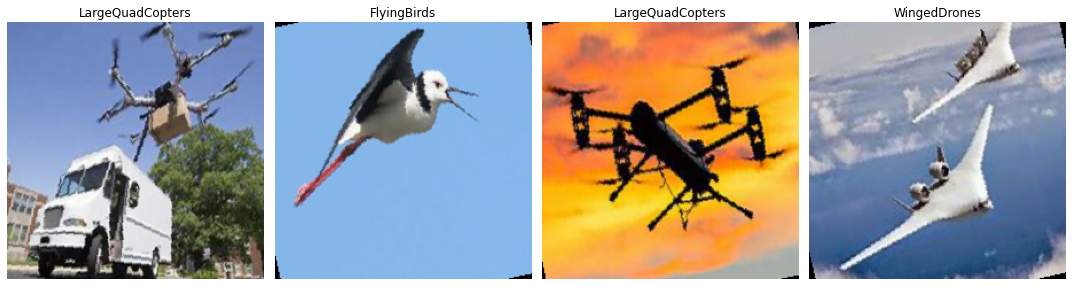

In [ ]:
class_names = ['FlyingBirds','LargeQuadCopters','SmallQuadCopters','WingedDrones']
data_transform = data_transform.image_show(class_names, 4, 1, 4, dataloader_train)

In [ ]:
model = get_pretrained_model('mobilenet_v2')

criterion, optimizer = get_optimiser(model)
scheduler = get_scheduler(optimizer)

save_file_name = 'mobilenet_v2-transfer-4.pt'

Downloading: "https://github.com/pytorch/vision/archive/v0.6.0.zip" to /root/.cache/torch/hub/v0.6.0.zip
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth


In [ ]:
model, history = train(
    model,
    criterion,
    optimizer,
    dataloader_train,
    dataloader_valid,
    save_file_name,
    scheduler,
    max_epochs_stop=5,
    n_epochs=20
    )


  0%|          | 0/119 [00:00<?, ?it/s]

Epoch 0/19
----------


  0%|          | 0/51 [00:00<?, ?it/s]

train Loss: 1.0495 Acc: 0.5651


  0%|          | 0/119 [00:00<?, ?it/s]

val Loss: 0.7472 Acc: 0.7323
Epoch 1/19
----------


  0%|          | 0/51 [00:00<?, ?it/s]

train Loss: 0.6949 Acc: 0.7387


  0%|          | 0/119 [00:00<?, ?it/s]

val Loss: 0.5831 Acc: 0.7743
Epoch 2/19
----------


  0%|          | 0/51 [00:00<?, ?it/s]

train Loss: 0.5980 Acc: 0.7724


  0%|          | 0/119 [00:00<?, ?it/s]

val Loss: 0.5211 Acc: 0.8094
Epoch 3/19
----------


  0%|          | 0/51 [00:00<?, ?it/s]

train Loss: 0.5531 Acc: 0.7835


  0%|          | 0/119 [00:00<?, ?it/s]

val Loss: 0.4937 Acc: 0.8102
Epoch 4/19
----------


  0%|          | 0/51 [00:00<?, ?it/s]

train Loss: 0.5373 Acc: 0.7903


  0%|          | 0/119 [00:00<?, ?it/s]

val Loss: 0.4800 Acc: 0.8145
Epoch 5/19
----------


  0%|          | 0/51 [00:00<?, ?it/s]

train Loss: 0.5223 Acc: 0.7962


  0%|          | 0/119 [00:00<?, ?it/s]

val Loss: 0.4769 Acc: 0.8176
Epoch 6/19
----------


  0%|          | 0/51 [00:00<?, ?it/s]

train Loss: 0.5157 Acc: 0.8007


  0%|          | 0/119 [00:00<?, ?it/s]

val Loss: 0.4769 Acc: 0.8170
Epoch 7/19
----------


  0%|          | 0/51 [00:00<?, ?it/s]

train Loss: 0.5219 Acc: 0.7947


  0%|          | 0/119 [00:00<?, ?it/s]

val Loss: 0.4769 Acc: 0.8154
Epoch 8/19
----------


  0%|          | 0/51 [00:00<?, ?it/s]

train Loss: 0.5204 Acc: 0.7979


  0%|          | 0/119 [00:00<?, ?it/s]

val Loss: 0.4735 Acc: 0.8208
Epoch 9/19
----------


  0%|          | 0/51 [00:00<?, ?it/s]

train Loss: 0.5144 Acc: 0.7990


  0%|          | 0/119 [00:00<?, ?it/s]

val Loss: 0.4741 Acc: 0.8180
Epoch 10/19
----------


  0%|          | 0/51 [00:00<?, ?it/s]

train Loss: 0.5189 Acc: 0.8033


  0%|          | 0/119 [00:00<?, ?it/s]

val Loss: 0.4735 Acc: 0.8196
Epoch 11/19
----------


  0%|          | 0/51 [00:00<?, ?it/s]

train Loss: 0.5173 Acc: 0.8013


  0%|          | 0/119 [00:00<?, ?it/s]

val Loss: 0.4736 Acc: 0.8193
Epoch 12/19
----------


  0%|          | 0/51 [00:00<?, ?it/s]

train Loss: 0.5133 Acc: 0.8008


  0%|          | 0/119 [00:00<?, ?it/s]

val Loss: 0.4725 Acc: 0.8206
Epoch 13/19
----------


  0%|          | 0/51 [00:00<?, ?it/s]

train Loss: 0.5152 Acc: 0.8008


  0%|          | 0/119 [00:00<?, ?it/s]

val Loss: 0.4730 Acc: 0.8197
Epoch 14/19
----------


  0%|          | 0/51 [00:00<?, ?it/s]

train Loss: 0.5136 Acc: 0.7988


  0%|          | 0/119 [00:00<?, ?it/s]

val Loss: 0.4739 Acc: 0.8191
Epoch 15/19
----------


  0%|          | 0/51 [00:00<?, ?it/s]

train Loss: 0.5151 Acc: 0.7984


  0%|          | 0/119 [00:00<?, ?it/s]

val Loss: 0.4729 Acc: 0.8182
Epoch 16/19
----------


  0%|          | 0/51 [00:00<?, ?it/s]

train Loss: 0.5169 Acc: 0.7982


  0%|          | 0/119 [00:00<?, ?it/s]

val Loss: 0.4723 Acc: 0.8205
Epoch 17/19
----------


  0%|          | 0/51 [00:00<?, ?it/s]

train Loss: 0.5145 Acc: 0.8007


  0%|          | 0/119 [00:00<?, ?it/s]

val Loss: 0.4743 Acc: 0.8180
Epoch 18/19
----------


  0%|          | 0/51 [00:00<?, ?it/s]

train Loss: 0.5151 Acc: 0.7990


  0%|          | 0/119 [00:00<?, ?it/s]

val Loss: 0.4742 Acc: 0.8168
Epoch 19/19
----------


  0%|          | 0/51 [00:00<?, ?it/s]

train Loss: 0.5159 Acc: 0.8003


100%|██████████| 51/51 [00:29<00:00,  1.70it/s]

val Loss: 0.4731 Acc: 0.8188
Training complete in 35m 47s
Best val Acc: 0.820792


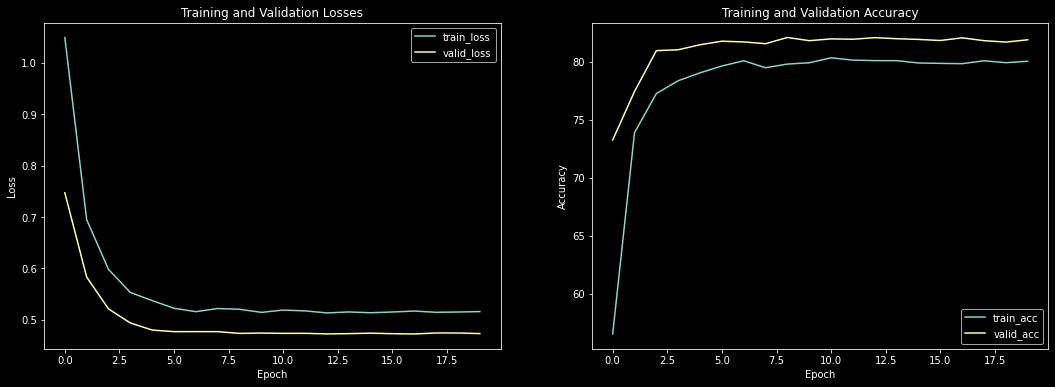

In [ ]:
from utils.model_analysis import plot_training_stat
figure = plot_training_stat(history)
figure.savefig('loss_accuracy_curves.png')

In [ ]:
model.load_state_dict(torch.load(save_file_name))
model.eval()

MobileNetV2(
  (features): Sequential(
    (0): ConvBNReLU(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNReLU(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNReLU(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=Tr

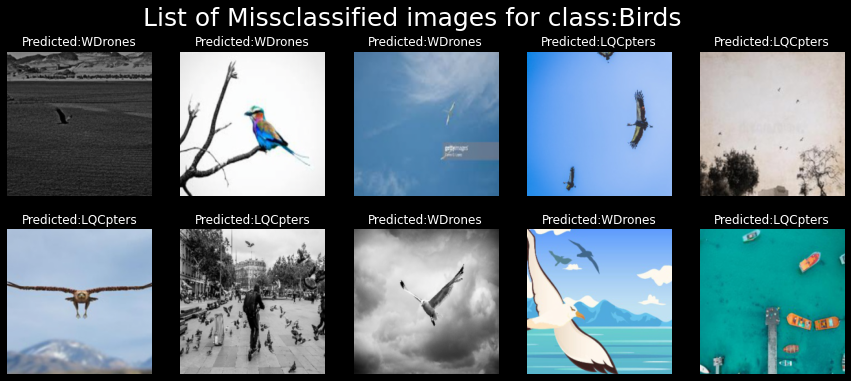

In [ ]:
#model2 = torch.load('/content/drive/My Drive/e4p2/bestModel2.pth')
from utils.model_analysis import plot_training_stat,plot_classwise_misclassified_Data
class_names = ['Birds','LQCpters','SQCpters','WDrones']
figure = plot_classwise_misclassified_Data(model,dataloader_valid,0,2,5,class_names)
figure.savefig('misclassified_birds.png')

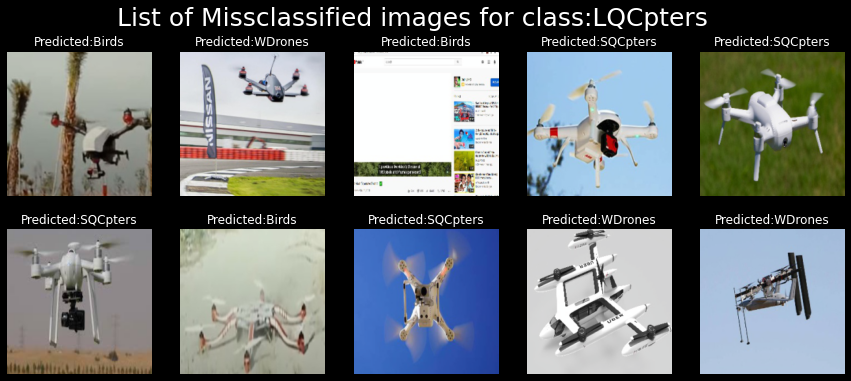

In [ ]:
figure = plot_classwise_misclassified_Data(model,dataloader_valid,1,2,5,class_names)
figure.savefig('misclassified_large_quadcopters.png')

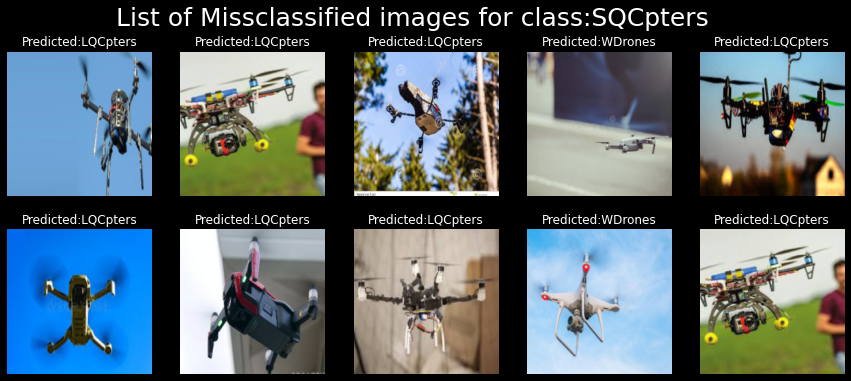

In [ ]:
figure = plot_classwise_misclassified_Data(model,dataloader_valid,2,2,5,class_names)
figure.savefig('misclassified_small_quadcopters.png')

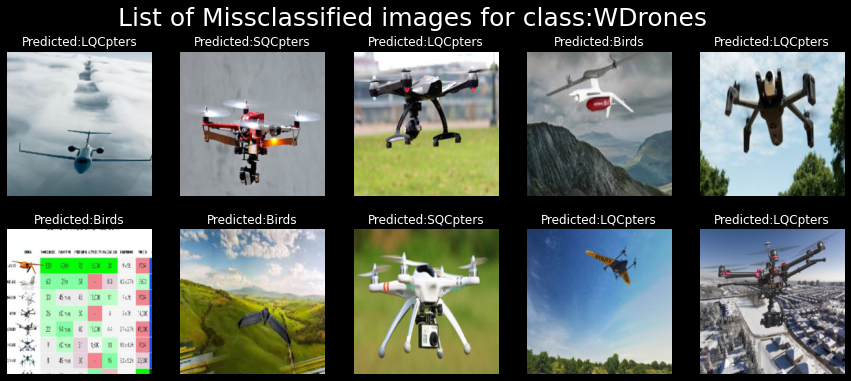

In [ ]:
figure = plot_classwise_misclassified_Data(model,dataloader_valid,3,2,5,class_names)
figure.savefig('misclassified_winged_drones.png')